## PCAによる次元圧縮
PCA : 主成分分析 Principal Component Analysis

- 多次元のデータを可能な限り少数のベクトルで表す
- 例えば3次元のデータでも、実はデータが一つの平面に(ほぼ)乗っているなら、2つのベクトルで表現できる ー＞2次元になる

方法
- 多次元のデータに対して、データの分散が一番大きくなる方向を見つけて、第1主成分とする
- 第1主成分を取り除いたあと、同様にデータの分散が大きくなる方向を見つけて、第2主成分とする



In [ ]:
# hide
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
import matplotlib.pyplot as plt
import numpy as np
import math
def plot(ax, x, label, idx=(0,1), **attr):
    ax.scatter(x[:,idx[0]], x[:,idx[1]], **attr)
    ax.set_title(label)#
    ax.axis('equal')

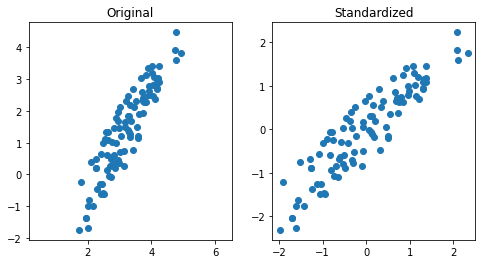

In [75]:
# データの生成と前処理
X, _ = make_blobs(random_state=0)
s, c = math.sin(math.pi/6.0), math.cos(math.pi/6.0), 
X *= np.array([0.15,1.0])
X += np.array([2, 0])
X = X @ np.array([[c, -s], [s, c]])
_, axes = plt.subplots(1,2, figsize=(8,4))
plot(axes[0], X, "Original")
ss = StandardScaler().fit(X)
X_s = ss.transform(X)
plot(axes[1], X_s, "Standardized")

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_s)


PCA(n_components=2)

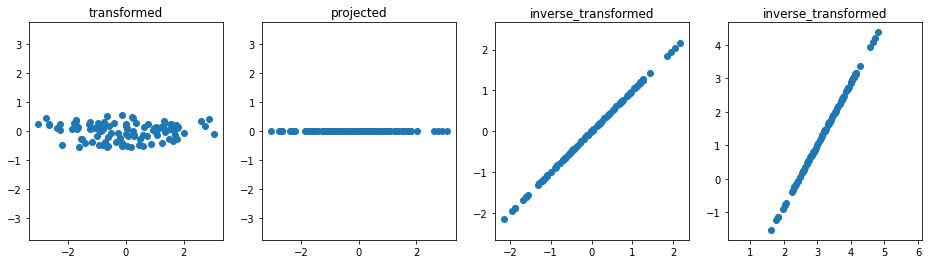

In [48]:
X_t = pca.transform(X_s)
_, axes = plt.subplots(1,4, figsize=(16,4))
plot(axes[0], X_t, "transformed")
X_t[:, 1] = 0
plot(axes[1], X_t, "projected")
X_i = pca.inverse_transform(X_t)
plot(axes[2], X_i, "inverse_transformed")
X_i2 = ss.inverse_transform(X_i)
plot(axes[3], X_i2, "inverse_transformed")

## 乳がん識別データセット
- 腫瘍が良性か悪性かを識別する
- 特徴量30 - 半径、面積、長径などなど
    

Original shape = (569, 30)


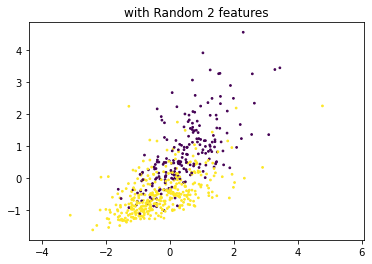

In [76]:
# ランダムな2つの特徴量による図示
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
ss = StandardScaler()
ss.fit(cancer.data)
X_s = ss.transform(cancer.data)
print("Original shape =", X_s.shape)
plot(plt.gca(), X_s, "with Random 2 features", idx=(4,5), c=cancer.target, s=3)

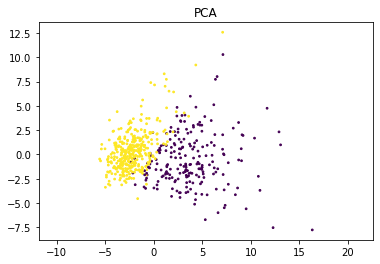

In [70]:
# 2つの主成分による図示
pca = PCA(n_components=2)
X_t = pca.fit_transform(X_s)
plot(plt.gca(), X_t, "PCA", c=cancer.target, s=3)

In [66]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')